In [18]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

# Feature Selection Based on Variance

Vairance is a statistical parameter which measures the distance of the data points from the mean. The formula for variance (sigma^2) is:


#### Write Formula here


One of the main feature selection methods is to remove low variance features from the feature list, because having low variance can be translated as having less or no information. A feature with low variance  does not add much value to model fitting process as it doesn't contain any useful information about the variability of data from its mean. If a data doesn't vary too much from its mean, then we can build a very simple prediction algorithm, which returns the mean of the data as the prediction value. As you can remember from Linear models, a coefficient b_i of a feature x_i explains how one unit change in x_i, results in b_i*x_i change in target variable y. If x_i doesn't change enough (low variance) then the independent variable and dependent variable do not covariate together. They will have lov covariance and correlation, which will result in a insignificant feature coefficient. Thus, this particular feature will not help to explain the variance in the target variable.


In [39]:
from statsmodels.regression.linear_model import OLS

I sampled below features from Normal distribution with different mean and standard deviations and plotted the vertical bar graph to visually see the realtive differences of feature variances.

In [211]:
x_1 = np.random.normal(loc=3, scale=0.9, size=1000)
x_2 = np.random.normal(loc=1, scale=0.8, size=1000)
x_3 = np.random.normal(loc=4, scale=0.7, size=1000) 
x_4 = np.random.normal(loc=6, scale=0.15, size=1000) 
x_5 = np.random.normal(loc=10, scale=0.1, size=1000) 
y = 0.4*x_1 + 0.3*x_2 + x_3 + 0.002*x_4 + 0.001*x_5 

In [212]:
X=pd.DataFrame(data={'x_1':x_1, 'x_2':x_2, 'x_3':x_3, 'x_4':x_4, 'x_5':x_5})

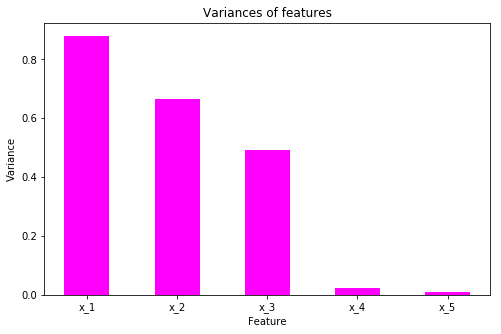

In [213]:
plt.figure(figsize=(8,5))
fig = plt.bar(X.columns, X.var(), color='magenta', width=0.5);
plt.title('Variances of features');
plt.xlabel('Feature');
plt.ylabel('Variance');

You can either plot the variances of features and drop low variance features, x_4 and x_5 in this case, from your feature set, X. Another option could be to write a simple algorithm to remove a feature if its variance is below a certain threshold. Alternatively, you can use VarianceThreshold from sklearn.feature_selection which, implements the above discussed algorithm.

In [217]:
from sklearn.feature_selection import VarianceThreshold
feature_selection_var = VarianceThreshold(threshold=0.4)
feature_selection_var.fit_transform(X)

array([[ 3.25130226, -0.59206667,  3.15811164],
       [ 2.30068679,  1.19332437,  4.55031772],
       [ 4.64604316,  0.58528998,  4.49149007],
       ...,
       [ 1.8831131 ,  0.12990536,  4.11937498],
       [ 3.05693301,  0.79660743,  3.42022143],
       [ 3.11288721,  0.65374229,  2.81897382]])

You should follow variance threshold approach when you have many features >30, where you want to eliminate some of them initially to continue with the more sophisticated feature selection methods. Never forget, you should do feature selection during data analsyis, model building and testing phases. There is not such a restriction that you have to select your features during EDA phase. Feature selection is an iterative process.

# Feature Selection Based on Correlation vs Mutual Information

In [ ]:
from scipy.stats import spearmanr
from matplotlib.offsetbox import AnchoredText

In this section, we will deep dive into the mathematics behind Pearson correlation coefficient (r), its use as a feature selection criteria and the situations where Spearman rank and Mutual Information criteria should be preferred.
Correlation shows the degree of linear relationship/association between two continous variables/features. A relationship is linear when a change in one variable is associated with a proportional change in the other variable. It takes values between -1 and 1 where,
-1 shows very strong negative relationsip, 0 shows no linear relationship and +1 shows very strong positive relationship.

Bear in mind that, relationships between two variables are not always linear. Variables may have logarithmic, quadratic and other kind of relationships, which may have a very small Pearson correlation coefficient r, however they can be strongly associated. That's why you have to be careful when you consider Pearson correlation as a selection criterion as it will lead to wrong decisions if you have features with other relationships. I suggest to start with Pearson correlation if you have many features, but try to plot those features with low correlation to see if you have missed an important data or not.

Secondly, as a Data scientist you are not always asked to build a Linear model, you may build Additive models (Tree models), Neural Nets and others. The purpose of the other models mainly is to capture non-linear relationships between features and target variable. Then why would you only use Pearson correlation as a criterion, which only shows the degree of linear relationship? I have seen cases where a data scientist gets into the correlation trap and removes significant features from the dataset. Especially for classification problems usage of correlation as a feature selection criterion is not very usefull as the target variable is a Bernoulli random variable and there is not a true relationship between the target variable and the features.

*Use Pearson correlation coefficient r, when the data generating function is monotonic and linear. Monotonic means as x increases y increases and if x decreases y decreases. 

Pearson correlation coefficient is a good measurement of relationship between the independent and dependent variables when y changes monotonically with constant increments/decrements for every unit change in x_1. From calculus, you may remember that the first derivative of line 'dx' is constant for every x value, which means change in y is constant. This is the description of a monotonic linear function and Pearson correlation coefficient 'p' is used to calculate the degree of this particular association. Example: y_monotonic_linear = 1.5*x_1 + np.random.normal(0,1,1000)

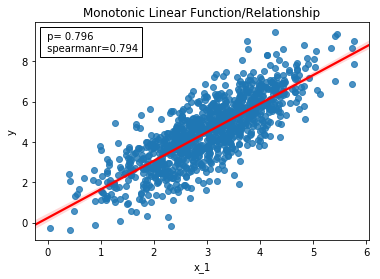

In [422]:
y_monotonic_linear = 1.5*x_1 + np.random.normal(0,1,1000)
f, ax = plt.subplots(1,1);
sns.regplot(x_1, y_monotonic_linear, order=1, ax=ax,line_kws={'color':'red'}).set_title('Monotonic Linear Function/Relationship');
ax.set_xlabel('x_1');
ax.set_ylabel('y');
p_monotonic_linear= round(np.corrcoef(x_1, y_monotonic_linear)[0][1],3)
spearmanr_monotonic_linear = round(spearmanr(x_1, y_monotonic_linear)[0],3) 
text = AnchoredText(' p= {} \n spearmanr={}'.format(p_monotonic_linear, spearmanr_monotonic_linear), loc=2)
ax.add_artist(text);


Let's have a look to the below graph where the function of x is monotonic, but not linear. x_ and y has a polynomial degree of 5 relationship, which monotonically increases, but at different rates at each x value. In other words, the derivative of the function is not constant over x_ values. Function formula: y_monotonic_poly5 = 2*np.power(x_,5) + np.random.uniform(1,10,1000). Person correlation p is estimated as 0.587 and this value for p is considered as a medium strength relationship between x_ and y values. However, if we look at the graph we could say the relationship between these variables is extremely strong. However, Pearson correlation couldn't capture this relatioship correctly. This means if you use Pearson correlation as your only feature selection criterion you will be misguided by the value of p. 

Luckily, there are some other measurements, which can define the association between two variables and one of them is Spearman rank correlation which is used for all monotonic functions. The only requirement for the association is monotonicity, which means the association can be either liner or non-linear. Spearman rank correlation also gets values in range [-1,1]. If you look at the linear function above, you can see that spearman rank correlation value spearmanr=0.794 is also too high showing stron linearg association. It is very close to pearson correlation p=0.796. 
However, for the monotonic but polynomial function below Pearson correlation couldn't show the strong association between the variables. On the other hand, Spearman rank correlation could successfully show it with spearmanr=0.972.

*So, the only guideline for Spearman rank correlation is the monotonic association. 

You may ask yourself, why people mainly use Pearson correlation during analysis but not Spearman rank? The obsious reason for that is Pearson correlation is the standardised covariance estimation between variables and this is the backbone of Linear Regression models. Knowing Pearson correlation between variables can tell a lot about the Linear Regression model as the model parameters/coefficients are calculated using covariance. So, the popularity of Pearson correlation is the use of this value for statistical inference. However, for feature selection you can opt for Spearman rank correlation as it can cover other monotonic associations between variables.


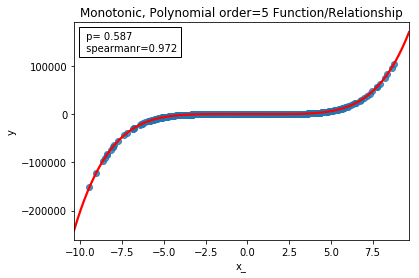

In [420]:
x_=np.random.normal(0,3,1000)
y_monotonic_poly5 = 2*np.power(x_,5) + np.random.uniform(1,10,1000)
f, ax = plt.subplots(1,1);
sns.regplot(x_, y_monotonic_poly5, order=5, ax=ax,line_kws={'color':'red'}).set_title('Monotonic, Polynomial order=5 Function/Relationship');
ax.set_xlabel('x_');
ax.set_ylabel('y');
p_monotonic_poly5= round(np.corrcoef(x_, y_monotonic_poly5)[0][1],3)
spearmanr_monotonic_poly5 = round(spearmanr(x_, y_monotonic_poly5)[0],3) 
text = AnchoredText(' p= {} \n spearmanr={}'.format(p_monotonic_poly5, spearmanr_monotonic_poly5), loc=2)
ax.add_artist(text);


Let's explore the below graph. The association between x and y below is quadratic: y = 1.2*np.power(x, 2) + np.random.normal(0,1,100). The function is not monotonic and/or linear as the function decreases at x values [-50,0] and increases at x values [1,50]. That's why the both, Pearson correlation and Spearman correlation have low values, suggesting no relationship between x and y. Howevr, there is a very strong quadratic relationship between these two variables. Imagine you use a correlation coefficient as your feature selection algorithm and ignore such a strong feature x. I advise you to plot and look at the scatter plot of the two variables. 

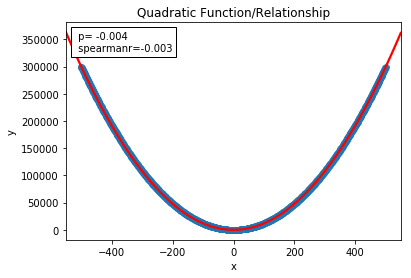

In [449]:
x = np.arange(-500,500)
y_quadratic = 1.2*np.power(x, 2) + np.random.normal(0,1,1000)
f, ax = plt.subplots(1,1);
sns.regplot(x, y_quadratic, order=2, ax=ax,line_kws={'color':'red'}).set_title('Quadratic Function/Relationship');
ax.set_xlabel('x');
ax.set_ylabel('y');
p_quadratic= round(np.corrcoef(x, y_quadratic)[0][1],3)
spearmanr_quadratic = round(spearmanr(x, y_quadratic)[0],3) 
text = AnchoredText(' p= {} \n spearmanr={}'.format(p_quadratic, spearmanr_quadratic), loc=2)
ax.add_artist(text);

So, Pearson correlation can only show the strength of the linear associations, whereas Spearman rank correlation covers broader range of associations, namely monotonic relationships. However, in real life scenarios two variables may have other kind of relationships such as polynomical, logarithmic, exponential and others.

## Mutual Information

Mutual Information (Information gain) is a metric introduced in Information Theory, that can identify any kind of relationship (mutual dependency) between two random variables. It can be used for regression and classification purposes as Mutual Information can work with discrete  as well as continous variables. MI calculates the additional information gained about one random variable by the introduction of the other random variable. For example, let X be a random variable denoting the outcome of a fair dice roll, X = {1,2,3,4,5,6}. If we look at only this information, we can say that probability of each outcome to be observed is p=1/6. I want to help you further. I want to introduce you another random variable Y={0,1}. Y is a Bernoulli random variable and there is a p=1/2 chance of Y getting each value. Imagine Y as an outcome of a coin flip Now, I am giving you further information saying that if Y=0 then outcome of the dice roll X is even, otherwise it is odd. Can you see the benefit of me giving you another variable Y? Can the introduction of new information Y=0 reduce your uncertainity (Entropy) about the outcome of X. Sure,it can, because if Y=0, then X can only get even values, X={2,4,6} and p=1/3. I somehowe helped you manage to narrow down the possible outcome of X, by telling you the value of Y. You gained extra information about the outcome of X by the introduction of variable Y. 

Some of you may be familiar with Information theory, especially the concept of Enthropy inroduced by Claude Shannon, which quantifies the uncertainity in data. I will try to explain the intuition behind these concepts and how they benefit Decision Tree models. However, I will not deep dive into mathematics as it is out of scope for this notebook. For learning more about entropy and information gain and its usage in decision tree construction I advise you to read the article by Saed Sayad at: https://www.saedsayad.com/decision_tree.htm



Entropy is sometimes called self-information or expected information, but do not get confused with this definition of  Entropy. Basically, if uncertainity is high it means the data contains more information, whereas if there is less uncertainity in data  it contains less information and is not useful as a feature in a model. It is quite similar to variance in the sense that data contains more information if it has more variance.
Entropy of a random variable X is denoted as H(X). Joint Entropy of X and Y random variables is denoted as H(X,Y). Conditional Entropy is denoted as H(X|Y). 
Joint Entropy of X and Y, H(X,Y):
H(X,Y)= H(Y) + H(X|Y) 

According to Entropy rules:

H(X,Y) >= max(H(X),H(Y)) X and Y together contains more information than X or Y solely.

H(X,Y) <= H(X) + H(Y) X and Y together contains less uncertainity than the sum of the uncertainity of X and Y 

H(X,Y) - H(Y) <= H(X) ---> H(X|Y) <= H(X) The introduction of Y reduced the uncertanity as now we can condition on Y when we predict the value of X 

Mutual Information is defined as below:
a. I(X;Y) = H(X) + H(Y) - H(X|Y)

So, when the dependency between two random variables is strong/high, Conditional Uncertanity/Entropy H(X|Y) is smaller. Smaller conditional entropy means more Information Gain/Mutual Information according to formula a. Consequently, we can say that if the Mutual Information is high between two variables X and Y, I(X;Y) then the association between these two variables is high.
So, how we can use Mutual Information as a criteria in future selection? Higher Mutual Information means stronger association.
For example, there could be another variable Z and H(X|Z) <  H(X|Y).By choosing Z as model predictor we could gain more Information, according to formula a. In other words, Z and X could have more Mutual information than X and Y. I(X;Z) > I(X;Y).

Mutual Information (Information Gain) is used as a criterion in desicion tree algorithms. Firstly, the Information Gain of every feature is calculated I(Y;X_i) and the future with the highest Information Gain is selected as the root node where the tree is splitted into its branches. The process is repeated recursively for other features to split to further branches and achieve to a leaf node.

Let's explore the below given example together. Features x_1, x_2 and x_3 are sampled from Uniform distribution, where x_1~U(-100,100), x_2~U(-100,100) and x_3~U(0,1). x_1 and x_2 have linear and quadratic relationship with target variable y, however x_3 is independent from y, as it is not used in the formulation/definition of y.
y = y=4*x_1 + 0.2*x_2^2 + e
e is random noise, where e~N(0,1).
Pearson correlation and Mutual Information for each relationsip is calculated and added to the plots. Pearson correlation was successful identifying the linear relationship between x_1 and y, corr = 0.4. However, it failed showing the quadratic relationship between x_2 and y, with corr=0.08. Most probably a naive feature selection algorithm, purely based on Pearson correlation coefficient would remove x_2 from the final set of features. However, Mutual Information quantifies the relationsip between x_2 and y relatively high, even higher than the relationship between x_1 and y. You can also easily identify the strong quadratic association between x_2 and y from the plot as it looks like a parabola. MI claims that x_2 has stronger association to y than x_1, which is also right. Plot of (x_2,y) pictures a strong quadratic association, however the plot of (x_1,y) shows a moderate linear association. How about x_3? There is something quite strange going on with x_3. Mutual Information could successfully identify the independence between x_3 and y. On the other hand, Pearson correlation shows a noticeable relationship with x_3 and y, even though x_3 was not included in the definition of y. Did it happen just by luck? Imagine you are using x_1 and x_3 in your model and ignoring a usefull feature x_2 in your model. If we try to translate your model to English, it translates to 'the model can sometimes predict y correctly, if we are lucky enough". And that happened because, we used x_3 as our feature. This opens another interesting topic, which we will discuss below.

In [850]:
from sklearn.feature_selection import mutual_info_regression
x_1 = np.random.uniform(-100,100,100)
x_2 = np.random.uniform(-100,100,100)
x_3 = np.random.uniform(0,1,100)
y_mi_reg = 4*x_1 + 0.2*np.power(x_2,2) + np.random.normal(0,1,100)
data = pd.DataFrame(data=np.column_stack((x_1,x_2,x_3, y_mi_reg)),columns=['x_1', 'x_2', 'x_3','y'])
mutual_info = np.round(mutual_info_regression(np.column_stack((x_1,x_2,x_3)),y_mi_reg),2)
corr = np.round(data.corr().loc['y'],2)[:-1]

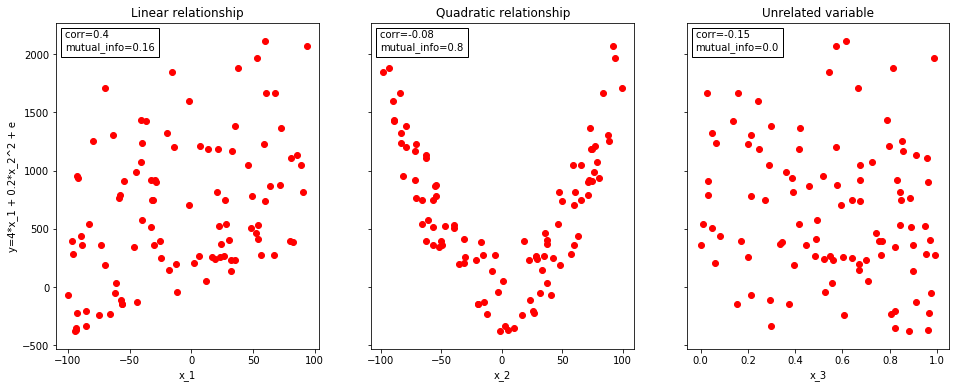

In [851]:
fig, axes = plt.subplots(1,3, sharey=True)
fig.set_size_inches(16,6)
#Linear relationship between x_1 and y
axes[0].scatter(x_1, y_mi_reg, color='red')
axes[0].set(xlabel="x_1", ylabel='y=4*x_1 + 0.2*x_2^2 + e', title='Linear relationship')
text_x_1 = AnchoredText('corr={} \nmutual_info={}'.format(corr[0], mutual_info[0]), loc=2)
axes[0].add_artist(text_x_1)

#Quadratic relationship between x_2 and y
axes[1].scatter(x_2, y_mi_reg, color='red')
axes[1].set(xlabel="x_2", title='Quadratic relationship')
text_x_2 = AnchoredText('corr={} \nmutual_info={}'.format(corr[1], mutual_info[1]), loc=2)
axes[1].add_artist(text_x_2)

#Unrelated RElationship
axes[2].scatter(x_3, y_mi_reg, color='red')
axes[2].set(xlabel="x_3", title='Unrelated variable')
text_x_3 = AnchoredText('corr={} \nmutual_info={}'.format(corr[2], mutual_info[2]), loc=2)
axes[2].add_artist(text_x_3)

## Mutual Information for Classification

In [855]:
from sklearn.feature_selection import mutual_info_classif, f_classif, f_regression

In [771]:
iris_loaded = datasets.load_iris()
data_iris = pd.DataFrame(data=iris_loaded['data'], columns=iris_loaded['feature_names'])
y_iris = pd.Series(data=iris_loaded['target'])
data_iris['Flower'] = y_iris

In [777]:
data_iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Flower,0.782561,-0.426658,0.949035,0.956547,1.000000


In [775]:
mutual_info_classif(data_iris.drop('Flower', axis=1), data_iris['Flower'])

array([0.47907498, 0.32400114, 0.98847156, 0.97176613])

## F Regression

We have discussed Pearson correlation, Spearman correlation and Mutual Information. The above analysis showed that, unlike correlation Mutual Information can identify the strength of association between two variables, regardless the nature of the association. That's why, it is preffered to use MI for feature selection process. However, as a Data Scientist you will work closely with a business team and business team prefers to see the correlation between the variables to understand how each factor/feature affects the target variable. That's why Pearson correlation will always stay as a significant part of your analysis. Let's forget the existence of Mutual Information for now and deep dive into another important feature selection crietria, F regression. 
When we calculated the correlation among features and y, we observed that the correlation between x_3 and y is high enough to select x_3 as a model feature. However, it is not even used in the definition of y, y = y=4*x_1 + 0.2*x_2^2 + e. x_3 is independent of y and it shouldn't be used as a feature. In real life scenario, you will not know how y is constructed, that's why the only measurement you will rely on is correlation coefficient. What can we do else, to prevent us from using x_3 as our feature? 
Statistical hypothesis testing comes handy in that scenario. Obviously, when you run any linear model either Linear or Logistic Regression, you will see some statistics calculated for each parameter/coeffcient. What do they mean and how we can calculate those statistic before even building the model? I will try to explain the intuition, rather than the mathematics of hypotheis testing for you to better understand and use it in your feature selection process.
If we return back to our examples, features, x_1, x_2 and x_3 are sampled from Uniform distribution (population). We have sampled 100 samples from each population. Any metrics we were calculating such as correlation was showing the correlation of samples (not the population) with target variable y. As we are not aware of the population parameters/statistics in real life (here we know), our estimates of correlation (or any parameter) can be irrelevant in the future (for unseen data). That means, the feature we have selected now because of its correlation with y, may not have a significant correlation in unseen data (other samples from population). As a result, we will get wrong predictions. 
Statistical tests come handy in this scenario. We have to test whether the parameters we have estimated now are significant enough, so we can rely on those estimations in the future. In other words, sample parameter estimations could describe population parameters or not. It may sound confusing, but we can better understand it with an example.
We estimated correlation between x_3 and y high enough for modelling purposes, but let's see if this estimation is significant enough. We think correlation of x_3 and y being strong enough was just by luck. To test that, we use f_regression provided by sklearn.feature_selection. This function does F test on Pearson correlation coefficient and returns F statistic as well as p values. I assume you know what p value means. If p value <= 0.05, it means we can reject the null hypotheis that the estimated parameter (correlation in this case) is not significant. In other words if p value <= 0.05 (5%), we can say that the correlation of x and y is significant. It means the population parameter will be in the 95% confidence interval of this estimation. That's why the sample correlation can be a good representative of true population correlation. It was not just by luck.

The code block below, resamples from propulation 7 times and calculates correlation, F stats and p values for each sample. So, we have 7 different samples and results. If you carefully look at the p values of correlation between x_3 and y, you can observe that p values > 0.05. Moreover, the correlation varies a lot. What does it mean for us? It means the estimated correlation coefficient is not significant or it is not a true representative of population correlation. That's why we cannot rely on our correlation estimation and select x_3 as a model feature. In practice, you just have to use F regression and look at the p-values of each correlation. I have done resampling 7 times to prove how the correlation between x_3 and y can vary a lot due to sampling bias, however the correlation x_1 and y is close enough. P values of the correlation between x_2 and y also show that x_2 is not a good feature, however this is because of the type of relationship between these two variables.

In [926]:
def resample_features():
    x_1 = np.random.uniform(-100,100,100)
    x_2 = np.random.uniform(-100,100,100)
    x_3 = np.random.uniform(0,1,100)
    y_mi_reg = 4*x_1 + 0.2*np.power(x_2,2) + np.random.normal(0,1,100)
    X=np.column_stack((x_1,x_2,x_3))
    return X, y_mi_reg

In [927]:
def find_corr_fval_pval(X,y):
    corr_coefs = []
    for i in range(X.shape[1]):
        corr_coefs.append(np.round(np.corrcoef(X[:,i],y)[0][1],3))
    fvals, pvals= np.round(f_regression(X,y),3)[0,:], np.round(f_regression(X,y),3)[1,:]
    return pd.DataFrame({'P corr':corr_coefs, 'F values':fvals, 'P values':pvals}, index=['x_1','x_2','x_3'])

In [928]:
for i in range(7):
    X,y = resample_features()
    print(find_corr_fval_pval(X,y))

     P corr  F values  P values
x_1   0.312    10.550     0.002
x_2  -0.235     5.753     0.018
x_3  -0.054     0.291     0.591
     P corr  F values  P values
x_1   0.394    18.057     0.000
x_2  -0.000     0.000     0.998
x_3  -0.177     3.170     0.078
     P corr  F values  P values
x_1   0.236     5.761     0.018
x_2  -0.177     3.177     0.078
x_3  -0.033     0.109     0.742
     P corr  F values  P values
x_1   0.291     9.039     0.003
x_2  -0.011     0.012     0.913
x_3   0.006     0.004     0.953
     P corr  F values  P values
x_1   0.429    22.081     0.000
x_2   0.027     0.071     0.790
x_3   0.131     1.723     0.192
     P corr  F values  P values
x_1   0.309    10.333     0.002
x_2  -0.008     0.007     0.934
x_3  -0.012     0.014     0.907
     P corr  F values  P values
x_1   0.311    10.456     0.002
x_2  -0.012     0.013     0.908
x_3  -0.137     1.862     0.176


Note, you can use F test for classification as well, sklearn.feature_selection.f_classif

In [143]:
boston_data = datasets.load_boston()

In [247]:
X_boston = pd.DataFrame(data=boston_data['data'], columns=boston_data['feature_names'])
y_boston = pd.Series(data=boston_data['target'])
X_boston['Target_Price'] = y_boston 

In [248]:
X_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


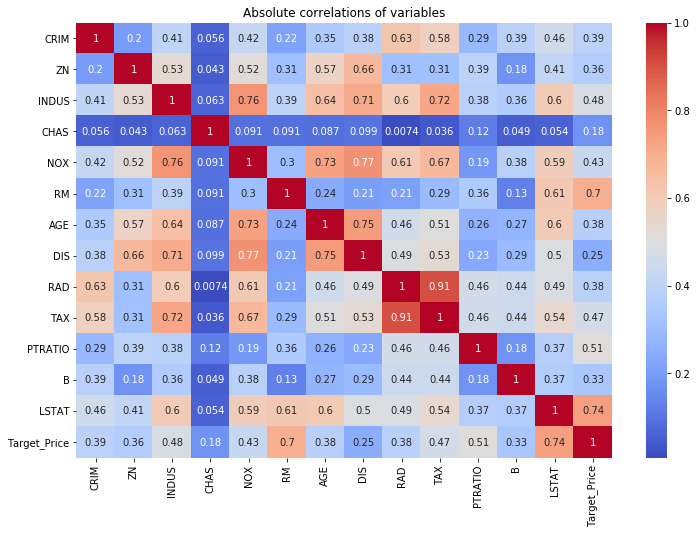

In [259]:
plt.figure(figsize=(12,8))
sns.heatmap(abs(X_boston.corr()), cmap='coolwarm', annot=True).set_title('Absolute correlations of variables');

In [766]:
np.round(mutual_info_regression(X_boston.drop('Target_Price', axis=1), X_boston['Target_Price']),2)

array([0.34, 0.19, 0.48, 0.01, 0.47, 0.53, 0.31, 0.3 , 0.23, 0.37, 0.45,
       0.16, 0.67])

In [767]:
np.round(X_boston.corr().loc['Target_Price'][:-1],2)

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
Name: Target_Price, dtype: float64

In [761]:
X_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Target_Price'],
      dtype='object')

In [165]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu